In [ ]:
# Optional: sparse matrix visualization
try:
    from scipy.sparse import csr_matrix
    SCIPY_AVAILABLE = True
except Exception:
    SCIPY_AVAILABLE = False
    print("scipy not available: full sparse-plot will use a sampled dense matrix.")

In [52]:
import datetime

In [26]:
import pandas as pd

def load_movielens_1m(path="data\ml-1m"):
    # Load ratings
    ratings = pd.read_csv(
        f"{path}ratings.dat",
        sep="::",
        engine="python",
        names=["userId", "movieId", "rating", "timestamp"]
    )

    # Load movies
    movies = pd.read_csv(
        f"{path}movies.dat",
        sep="::",
        engine="python",
        names=["movieId", "title", "genres"],
        encoding="latin-1"
    )

    # Load users
    users = pd.read_csv(
        f"{path}users.dat",
        sep="::",
        engine="python",
        names=["userId", "gender", "age", "occupation", "zip"]
    )

    return ratings, movies, users


path = r"C:\Users\atalb\Documents\Coding\MLandAI\MLProjects\MovieRecommender\data\ml-1m\\"
# Example usage
ratings, movies, users = load_movielens_1m(path=path)
print(ratings.head())
print(movies.head())
print(users.head())


   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   userId gender  age  occupation    zip
0       1      F    1          10  48067
1       2      M   56          16  70072
2       3      M   25          15  55117
3       4      M   45           7  02460
4       5      M   25          20  55455


In [27]:
print("Shapes:")
print(" ratings:", ratings.shape)
print(" movies: ", movies.shape)
print(" users:  ", users.shape)
print("\nratings dtypes:\n", ratings.dtypes)
print("\nFirst 3 ratings rows:\n", ratings.head(3))
print("\nFirst 3 movies rows:\n", movies.head(3))
print("\nFirst 3 users rows:\n", users.head(3))

Shapes:
 ratings: (1000209, 4)
 movies:  (3883, 3)
 users:   (6040, 5)

ratings dtypes:
 userId       int64
movieId      int64
rating       int64
timestamp    int64
dtype: object

First 3 ratings rows:
    userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968

First 3 movies rows:
    movieId                    title                        genres
0        1         Toy Story (1995)   Animation|Children's|Comedy
1        2           Jumanji (1995)  Adventure|Children's|Fantasy
2        3  Grumpier Old Men (1995)                Comedy|Romance

First 3 users rows:
    userId gender  age  occupation    zip
0       1      F    1          10  48067
1       2      M   56          16  70072
2       3      M   25          15  55117


In [28]:
print("\nMissing values (per dataframe):")
print("ratings:\n", ratings.isnull().sum())
print("movies:\n", movies.isnull().sum())
print("users:\n", users.isnull().sum())


Missing values (per dataframe):
ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movies:
 movieId    0
title      0
genres     0
dtype: int64
users:
 userId        0
gender        0
age           0
occupation    0
zip           0
dtype: int64


In [29]:
# Duplicates
print("\nDuplicates checks:")
print("ratings duplicate rows:", ratings.duplicated().sum())
print("movies duplicate movieId:", movies['movieId'].duplicated().sum())
print("movies duplicate titles:", movies['title'].duplicated().sum())
print("users duplicate userId:", users['userId'].duplicated().sum())



Duplicates checks:
ratings duplicate rows: 0
movies duplicate movieId: 0
movies duplicate titles: 0
users duplicate userId: 0


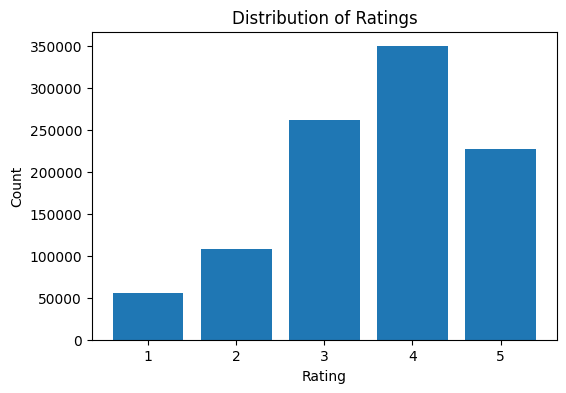

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))
plt.hist(ratings['rating'], bins=np.arange(0.5, 5.5+1e-6, 1), rwidth=0.8)
plt.xticks([1,2,3,4,5])
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

In [31]:
print("\nRatings summary:")
print(ratings['rating'].describe())


Ratings summary:
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [32]:
rpu = ratings.groupby('userId').size().rename("num_ratings")
print("\nRatings per user summary:")
print(rpu.describe())


Ratings per user summary:
count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: num_ratings, dtype: float64


In [34]:
# top 10 most active users
print("\nTop 10 users by number of ratings:")
print(rpu.sort_values(ascending=False).head(10))


Top 10 users by number of ratings:
userId
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: num_ratings, dtype: int64


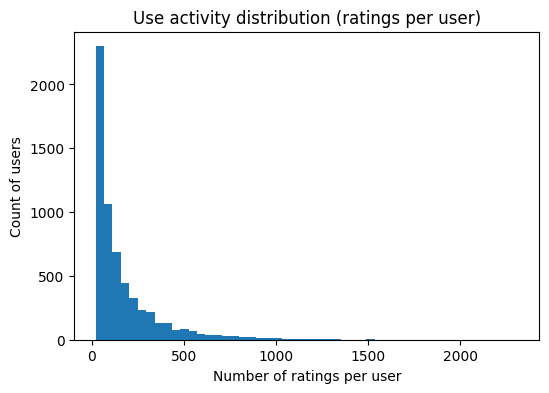

In [35]:
plt.figure(figsize=(6,4))
plt.hist(rpu, bins=50)
plt.xlabel("Number of ratings per user")
plt.ylabel("Count of users")
plt.title("Use activity distribution (ratings per user)")
plt.show()

In [36]:
# Step 6 - ## Ratings per movie

rpm = ratings.groupby('movieId').size().rename("num_ratings")
print("\nRatings per movie summary:")
print(rpm.describe())



Ratings per movie summary:
count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: num_ratings, dtype: float64


In [38]:

# Top 20 movies by count (join with titles)
top_movies = rpm.sort_values(ascending=False).head(20).reset_index().merge(movies, on='movieId')[['movieId', 'title', 'num_ratings']]
print("\nTop 20 most-rated movies:")
print(top_movies)


Top 20 most-rated movies:
    movieId                                              title  num_ratings
0      2858                             American Beauty (1999)         3428
1       260          Star Wars: Episode IV - A New Hope (1977)         2991
2      1196  Star Wars: Episode V - The Empire Strikes Back...         2990
3      1210  Star Wars: Episode VI - Return of the Jedi (1983)         2883
4       480                               Jurassic Park (1993)         2672
5      2028                         Saving Private Ryan (1998)         2653
6       589                  Terminator 2: Judgment Day (1991)         2649
7      2571                                 Matrix, The (1999)         2590
8      1270                          Back to the Future (1985)         2583
9       593                   Silence of the Lambs, The (1991)         2578
10     1580                                Men in Black (1997)         2538
11     1198                     Raiders of the Lost Ark (1981

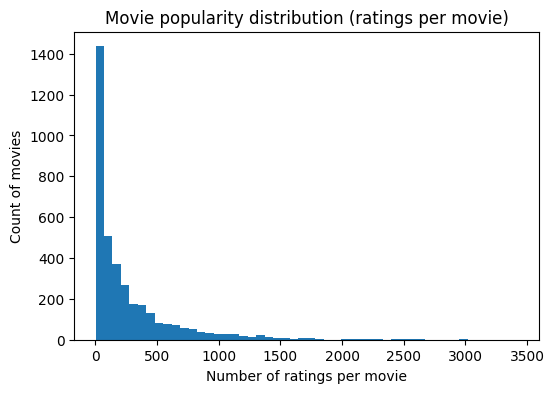

In [39]:
plt.figure(figsize=(6,4))
plt.hist(rpm, bins=50)
plt.xlabel("Number of ratings per movie")
plt.ylabel("Count of movies")
plt.title("Movie popularity distribution (ratings per movie)")
plt.show()

In [40]:
# Step 7 — rating bias checks

overall_mean = ratings['rating'].mean()
print("\nOverall mean rating:", overall_mean)


Overall mean rating: 3.581564453029317


In [41]:
# Per-user mean rating distribution (shows user bias: harsh vs lenient raters)
user_mean = ratings.groupby('userId')['rating'].mean()
print("\nPer-user mean rating stats:")
print(user_mean.describe())


Per-user mean rating stats:
count    6040.000000
mean        3.702705
std         0.429622
min         1.015385
25%         3.444444
50%         3.735294
75%         4.000000
max         4.962963
Name: rating, dtype: float64


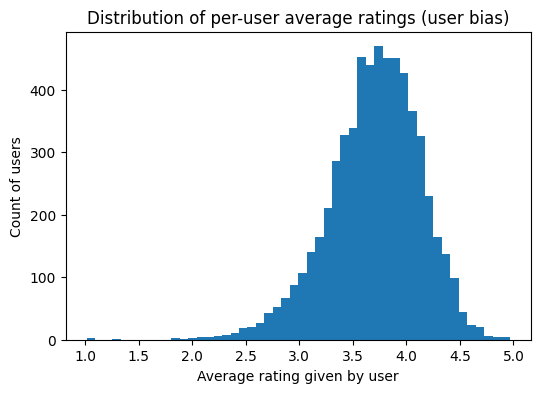

In [42]:
plt.figure(figsize=(6,4))
plt.hist(user_mean, bins=50)
plt.xlabel("Average rating given by user")
plt.ylabel("Count of users")
plt.title("Distribution of per-user average ratings (user bias)")
plt.show()

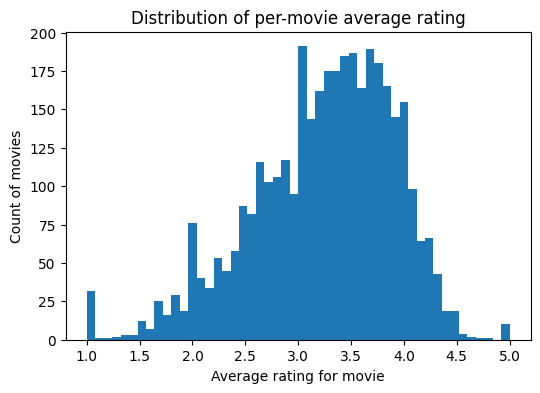

In [43]:
# Per-movie mean rating distribution (shows which movies are rated high on average)
movie_mean = ratings.groupby('movieId')['rating'].mean()
plt.figure(figsize=(6,4))
plt.hist(movie_mean, bins=50)
plt.xlabel("Average rating for movie")
plt.ylabel("Count of movies")
plt.title("Distribution of per-movie average rating")
plt.show()

In [44]:
# Users with highest & lowest average ratings (lenient vs harsh)
print("\nTop 10 lenient users (highest avg rating):")
print(user_mean.sort_values(ascending=False).head(10))
print("\nTop 10 harsh users (lowest avg rating):")
print(user_mean.sort_values(ascending=True).head(10))


Top 10 lenient users (highest avg rating):
userId
283     4.962963
2339    4.956522
3324    4.904762
3902    4.890909
446     4.843137
447     4.837838
4649    4.818182
4634    4.813725
1131    4.796117
4925    4.761905
Name: rating, dtype: float64

Top 10 harsh users (lowest avg rating):
userId
3598    1.015385
4486    1.058824
2744    1.304348
4539    1.815126
5850    1.844828
5334    1.927273
4349    1.962963
4636    2.000000
5686    2.045283
3209    2.060870
Name: rating, dtype: float64


In [45]:
# Step 8 — weird values checks

In [46]:
all_genres = set()
for g in movies['genres'].dropna().unique():
    for gi in g.split('|'):
        all_genres.add(gi)


print("\nUnique genres (sample):", sorted(list(all_genres))[:30])


Unique genres (sample): ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [48]:
# Movies with no genres
no_genre = movies[movies['genres'].isnull()|(movies['genres'].str.strip()== '')]
print("Movies with missing/empty genres:", no_genre.shape[0])

Movies with missing/empty genres: 0


In [50]:
# Titles with weird unicode characters (example detection)
weird_titles = movies[movies['title'].str.contains(r"[^\x00-\x7F]", regex=True, na=False)]
print("Movies with non-ascii characters in title (sample up to 10):", weird_titles.head(10))





Movies with non-ascii characters in title (sample up to 10):       movieId                                              title  \
72         73                             Misérables, Les (1995)   
566       570               Slingshot, The (Kådisbellan ) (1993)   
578       582                      Metisse (Café au Lait) (1993)   
643       649                 Cold Fever (Á köldum klaka) (1994)   
1101     1117         Eighth Day, The (Le Huitième jour ) (1996)   
1133     1149          JLG/JLG - autoportrait de décembre (1994)   
1160     1176  Double Life of Veronique, The (La Double Vie d...   
1193     1211    Wings of Desire (Der Himmel über Berlin) (1987)   
1300     1320                                      Alien³ (1992)   
1343     1364         Zero Kelvin (Kjærlighetens kjøtere) (1995)   

                             genres  
72                    Drama|Musical  
566                    Comedy|Drama  
578                          Comedy  
643                    Comedy|Drama  


In [54]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [56]:
# Timestamp sanity: check earliest/latest timestamps
print("\nRatings timestamps (converted): min, max ->", ratings['timestamp'].min(), ratings['timestamp'].max())


Ratings timestamps (converted): min, max -> 956703932 1046454590


In [57]:
# -----------------------
# Step 9 — sparsity of user-movie matrix
# -----------------------
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
n_interactions = len(ratings)
sparsity = 1.0 - (n_interactions / (n_users * n_movies))
print(f"\nUser x Movie matrix: users={n_users}, movies={n_movies}, interactions={n_interactions}")
print(f"Sparsity: {sparsity:.6f}  (i.e. {sparsity*100:.4f}% empty)")

# Build sparse matrix (rows = users sorted, cols = movies sorted)
user_ids = np.sort(ratings['userId'].unique())
movie_ids = np.sort(ratings['movieId'].unique())
user_index = {uid: i for i, uid in enumerate(user_ids)}
movie_index = {mid: j for j, mid in enumerate(movie_ids)}
rows = ratings['userId'].map(user_index).to_numpy()
cols = ratings['movieId'].map(movie_index).to_numpy()
data = np.ones_like(rows, dtype=np.int8)   # presence indicator

if SCIPY_AVAILABLE:
    M = csr_matrix((data, (rows, cols)), shape=(len(user_ids), len(movie_ids)))
    plt.figure(figsize=(8,6))
    # plt.spy shows where non-zero entries are
    plt.spy(M, markersize=0.5)   # default color
    plt.xlabel("Movie index")
    plt.ylabel("User index")
    plt.title("Sparsity pattern (non-zero = rating exists)")
    plt.show()
else:
    # Fallback: sample a subset of users & movies and plot dense matrix
    sample_n_users = 300
    sample_n_movies = 300
    sampled_users = np.random.choice(user_ids, size=sample_n_users, replace=False)
    sampled_movies = np.random.choice(movie_ids, size=sample_n_movies, replace=False)
    sample_idx_u = [user_index[u] for u in sampled_users]
    sample_idx_m = [movie_index[m] for m in sampled_movies]
    # Create dense sampled matrix of 0/1 presence
    sample_mat = np.zeros((sample_n_users, sample_n_movies), dtype=np.int8)
    # Create a lookup set for quick membership
    interaction_set = set(zip(rows, cols))
    for i, ui in enumerate(sample_idx_u):
        for j, mj in enumerate(sample_idx_m):
            if (ui, mj) in interaction_set:
                sample_mat[i, j] = 1
    plt.figure(figsize=(8,6))
    plt.imshow(sample_mat)   # default colormap
    plt.xlabel("Sampled movie index")
    plt.ylabel("Sampled user index")
    plt.title("Sampled sparsity (1 = rating exists)")
    plt.show()


User x Movie matrix: users=6040, movies=3706, interactions=1000209
Sparsity: 0.955316  (i.e. 95.5316% empty)


NameError: name 'SCIPY_AVAILABLE' is not defined

In [ ]:
# -----------------------
# Optional: small dense heatmap of top users X top movies (for patterns)
# -----------------------
# Pick top 50 most active users and top 50 most-rated movies for dense visualization
top_users = rpu.sort_values(ascending=False).head(50).index
top_movies_50 = rpm.sort_values(ascending=False).head(50).index
subset = ratings[ratings['userId'].isin(top_users) & ratings['movieId'].isin(top_movies_50)]
pivot = subset.pivot_table(index='userId', columns='movieId', values='rating')
# Fill NaN with 0 for display (0 = no rating)
pivot_filled = pivot.fillna(0).values
plt.figure(figsize=(8,6))
plt.imshow(pivot_filled)   # shows ratings+0s (default colormap)
plt.xlabel("Top movies")
plt.ylabel("Top users")
plt.title("Dense view: top 50 users x top 50 movies (0 = no rating)")
plt.show()